In [100]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import t
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from pprint import pprint
from sklearn.model_selection import cross_validate

In [15]:
df = pd.read_csv('Virtual.csv')
df.head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2


In [17]:
#Make Immersion Level into a categorical value.
df['Immersed'] = (df['ImmersionLevel'] >3)
df.head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,Immersed
0,1,40,Male,HTC Vive,13.598508,8,5,True
1,2,43,Female,HTC Vive,19.950815,2,2,False
2,3,27,Male,PlayStation VR,16.543387,4,2,False
3,4,33,Male,HTC Vive,42.574083,6,3,False
4,5,51,Male,PlayStation VR,22.452647,4,2,False


In [19]:
#One-hot encoding. Change headset and gender into seperate categories and give 0/1 values.
df['HTCVive']= (df['VRHeadset'] == 'HTC Vive').astype(int)
df['PlayStationVR']= (df['VRHeadset'] == 'PlayStation VR').astype(int)
df['OculusRift']= (df['VRHeadset'] == 'Oculus Rift').astype(int)
df['Male']= (df['Gender'] == 'Male').astype(int)
df['Female']= (df['Gender'] == 'Female').astype(int)
df['Other']= (df['Gender'] == 'Other').astype(int)
df.head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,Immersed,HTCVive,PlayStationVR,OculusRift,Male,Female,Other
0,1,40,Male,HTC Vive,13.598508,8,5,True,1,0,0,1,0,0
1,2,43,Female,HTC Vive,19.950815,2,2,False,1,0,0,0,1,0
2,3,27,Male,PlayStation VR,16.543387,4,2,False,0,1,0,1,0,0
3,4,33,Male,HTC Vive,42.574083,6,3,False,1,0,0,1,0,0
4,5,51,Male,PlayStation VR,22.452647,4,2,False,0,1,0,1,0,0


In [105]:
#Output intercept, coefficients, and the accuracy.
predictors = ['HTCVive','PlayStationVR','OculusRift','Male','Female','Other','Age','Duration']
X1 = df[predictors]
X = sm.add_constant(X1)
y = df.Immersed
#logit = sm.Logit(df['Immersed'],sm.add_constant(df['Age','Duration']))
logit = LogisticRegression()
result = logit.fit(X,y)

# Print out the coefficients
print("Intercept: ", result.intercept_)
print("Coefficients: ", result.coef_)

# Print out the accuracy
print("Accuracy: ", result.score(X, y))

Intercept:  [-0.21457474]
Coefficients:  [[-0.21186833 -0.11943646 -0.01209036 -0.0803415   0.02442121 -0.11189185
  -0.12439769  0.00208563  0.00212897]]
Accuracy:  0.603


In [106]:
import statsmodels.api as sm


# Add an intercept to 'X'

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display summary statistics of the model's performance
print(result.summary())
#***************************************************#
#Validation

         Current function value: 0.670828
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Immersed   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                0.001412
Time:                        22:11:54   Log-Likelihood:                -670.83
converged:                      False   LL-Null:                       -671.78
Covariance Type:            nonrobust   LLR p-value:                    0.9289
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3466   1.94e+06  -1.79e-07      1.000   -3.81e+06    3.81e+06
HTCVive          -0.1637   8.56e+06  -1.91e-08      1.00

C:\Users\atkha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
#K-fold
scores = cross_val_score(logit, X, y, cv=10)
print("Cross-validated scores:", scores)
# Take the mean of the scores
print("Mean cross-validated score:", scores.mean())

Cross-validated scores: [0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.61 0.61 0.61]
Mean cross-validated score: 0.6030000000000001


In [37]:
#LOOCV
loo = LeaveOneOut()
scores_loo = cross_val_score(logit, X, y, cv=loo)

print("Leave-One-Out Cross-Validation scores:", scores_loo)
print("Mean Leave-One-Out Cross-Validation score:", scores_loo.mean())
#Since both LOOCV and 5-fold validation have similar mean scores, it's a good sign that the estimate for performance is true.

Leave-One-Out Cross-Validation scores: [0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1.

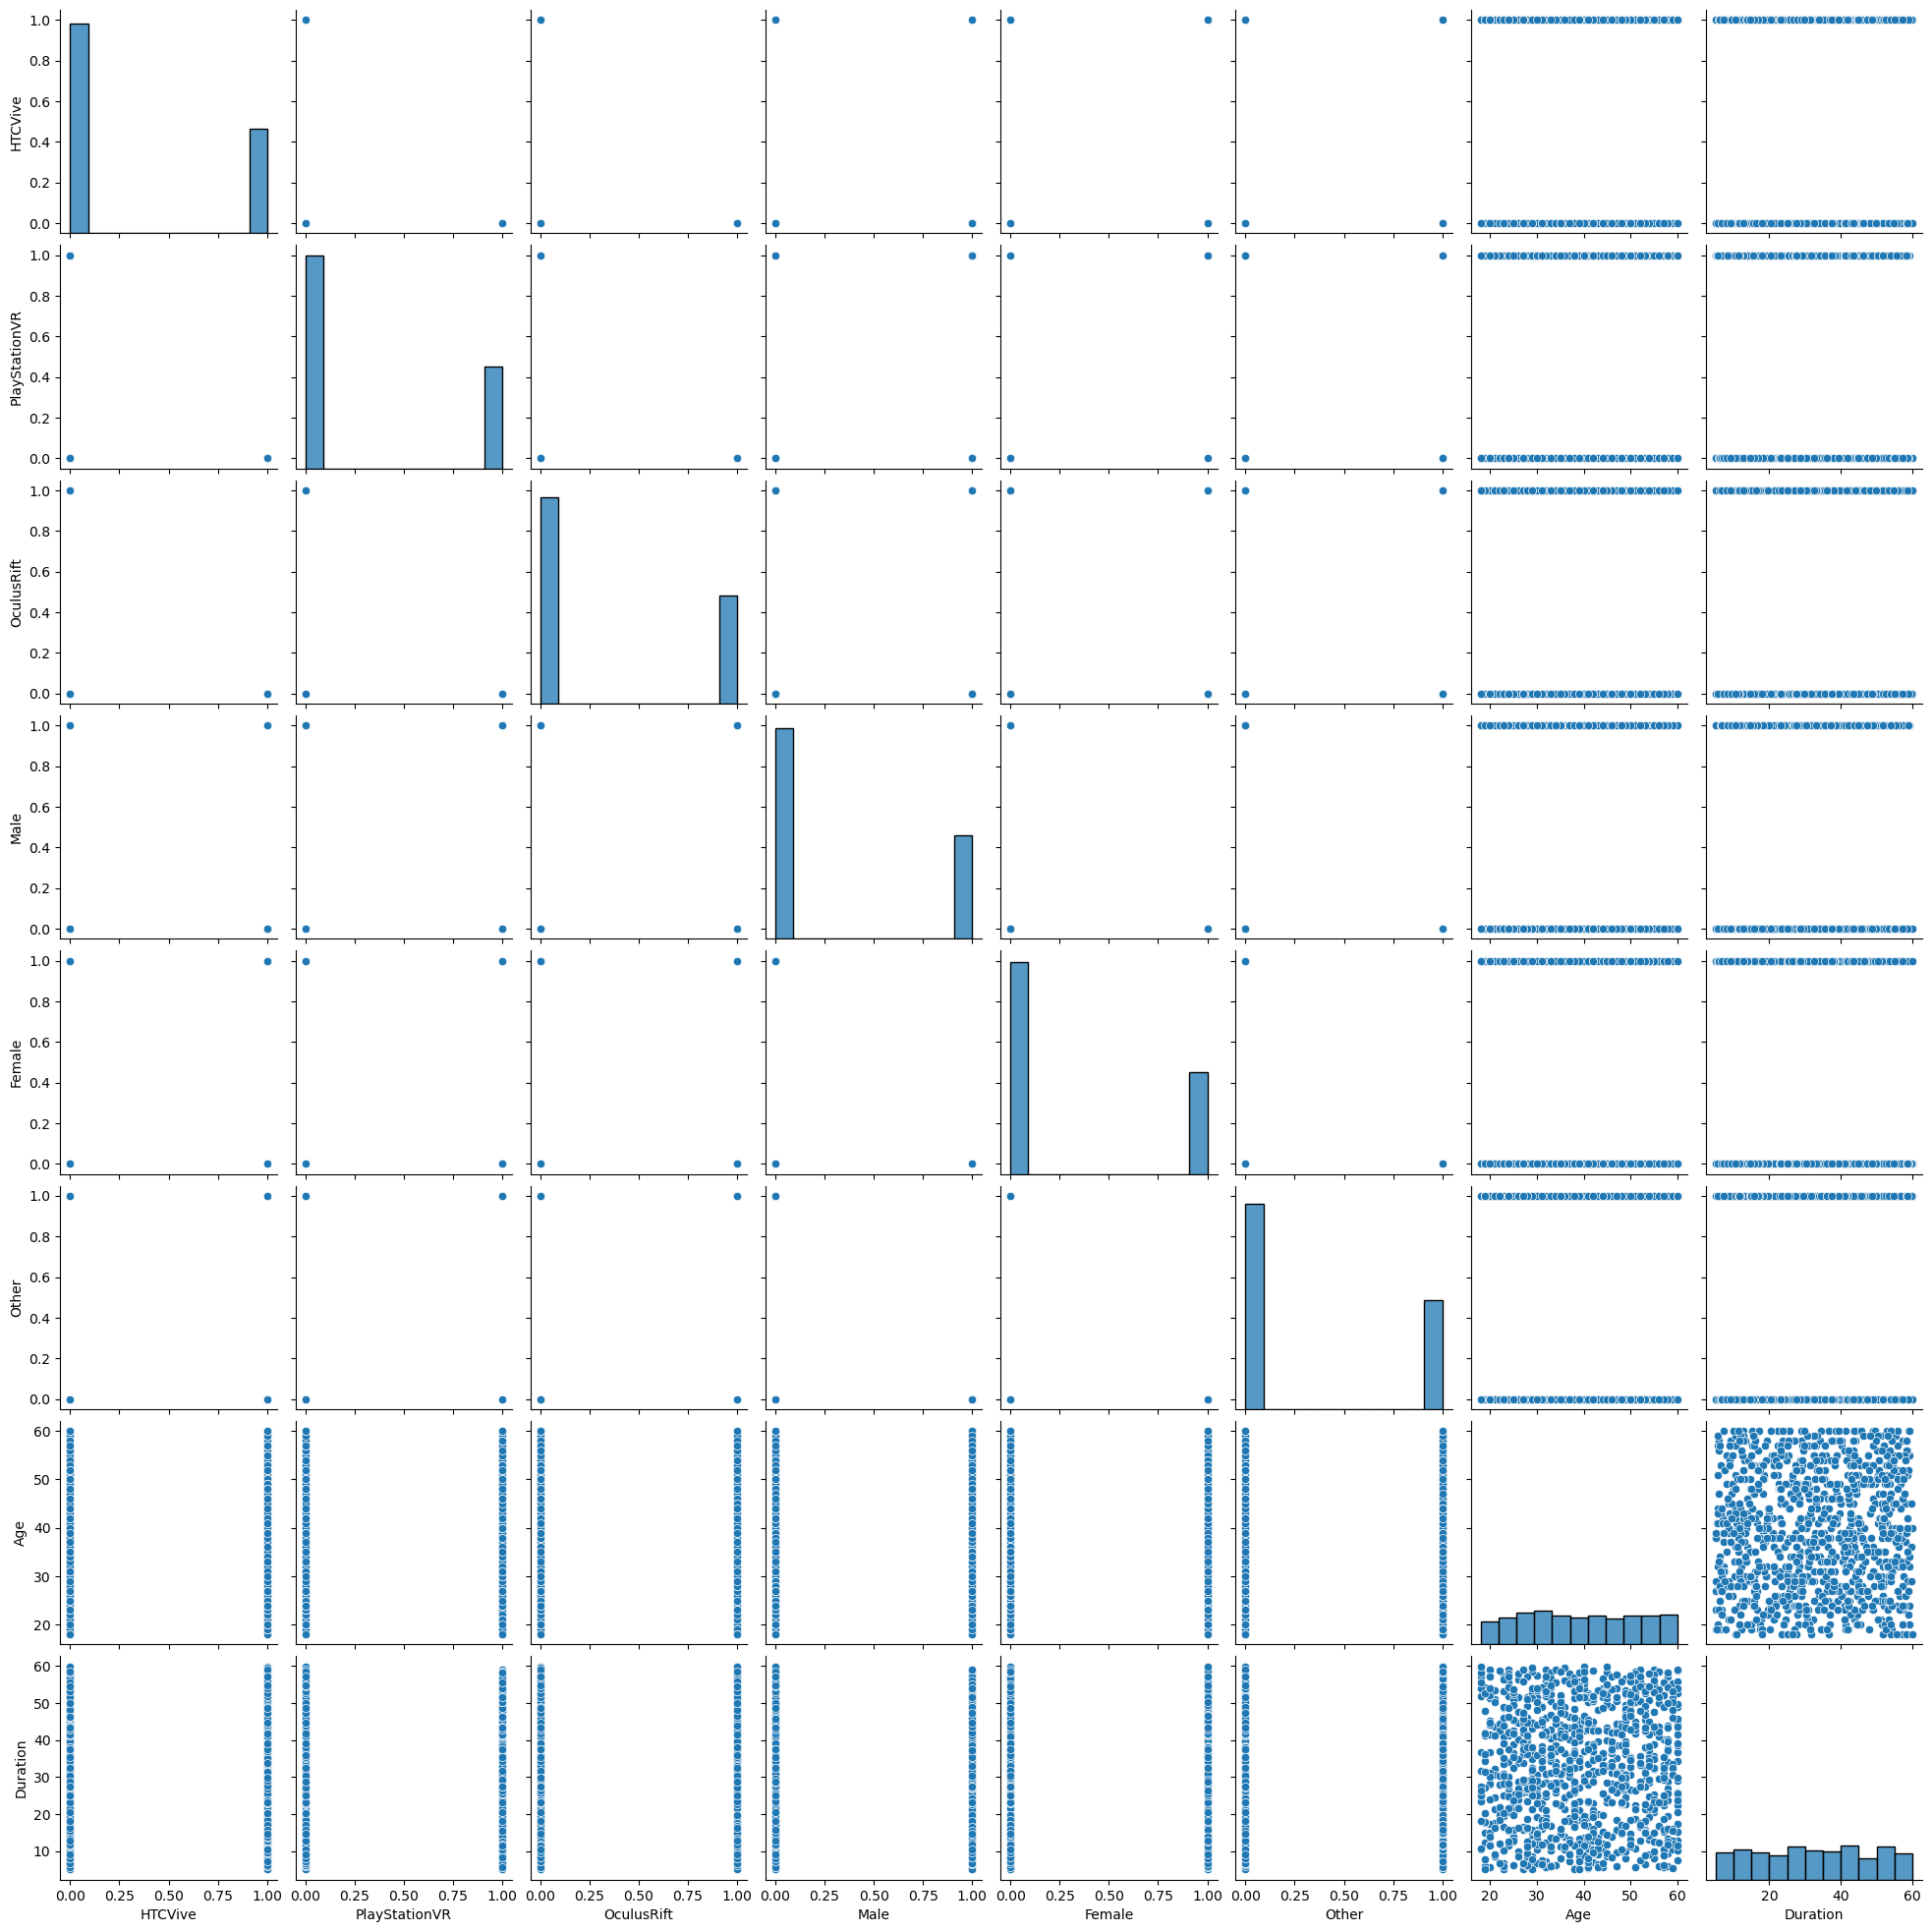

In [43]:
df_subset = df[predictors]

# Create pairplot
sns.pairplot(df_subset)

#Look at Age and Duration.
#Due to making lots of categories, many of the pair plots are just category vs. category, thus,
#looking like either a straight line or only in the corners.
#Straight lines can indicate a relationship, not necessarily collinearity.
#No collinearity in plot that has points everywehre

In [45]:
#PCR
# find the overall mean and covariance of the data
#X1 for predictors
#predictors = ['HTCVive','PlayStationVR','OculusRift','Male','Female','Other','Age','Duration']
#y for response
htcvive_std = (df['HTCVive'] - np.mean(df['HTCVive']))/np.std(df['HTCVive'], ddof=1)
playstationvr_std = (df['PlayStationVR'] - np.mean(df['PlayStationVR']))/np.std(df['PlayStationVR'], ddof=1)
oculusrift_std = (df['OculusRift'] - np.mean(df['OculusRift']))/np.std(df['OculusRift'], ddof=1)
male_std = (df['Male'] - np.mean(df['Male']))/np.std(df['Male'], ddof=1)
female_std = (df['Female'] - np.mean(df['Female']))/np.std(df['Female'], ddof=1)
other_std = (df['Other'] - np.mean(df['Other']))/np.std(df['Other'], ddof=1)
age_std = (df['Age'] - np.mean(df['Age']))/np.std(df['Age'], ddof=1)
duration_std = (df['Duration'] - np.mean(df['Duration']))/np.std(df['Duration'], ddof=1)
B = np.vstack((htcvive_std, playstationvr_std))
B = np.vstack((B, oculusrift_std))
B = np.vstack((B, male_std))
B = np.vstack((B, female_std))
B = np.vstack((B, other_std))
B = np.vstack((B, age_std))
B = np.vstack((B, duration_std))
# equivalently find the covariance using method COV
S = np.cov(B)
print(S)
#find the eigenvalues and eigenvectors
from numpy import linalg as LA
[V, D] = LA.eig(S)
print('eigenvalues')
print(V) # eigenvalues
print('eigenvectors')
print(D)  # eigenvectors

[[ 1.         -0.48915111 -0.51168242  0.01856499 -0.02059717  0.00194334
  -0.05130733  0.05380412]
 [-0.48915111  1.         -0.49908131 -0.03762644  0.02750856  0.0100789
  -0.01606745 -0.07919084]
 [-0.51168242 -0.49908131  1.          0.01861971 -0.0066339  -0.01185916
   0.06680284  0.02455233]
 [ 0.01856499 -0.03762644  0.01861971  1.         -0.48587716 -0.50931429
  -0.03809217 -0.01007707]
 [-0.02059717  0.02750856 -0.0066339  -0.48587716  1.         -0.50470658
  -0.00280969 -0.01485664]
 [ 0.00194334  0.0100789  -0.01185916 -0.50931429 -0.50470658  1.
   0.04039073  0.02458136]
 [-0.05130733 -0.01606745  0.06680284 -0.03809217 -0.00280969  0.04039073
   1.          0.02593506]
 [ 0.05380412 -0.07919084  0.02455233 -0.01007707 -0.01485664  0.02458136
   0.02593506  1.        ]]
eigenvalues
[ 9.57804508e-01  1.00021954e+00  1.44044610e+00  1.55541229e+00
  1.52994096e+00  1.51617661e+00  9.71325367e-17 -1.47777000e-16]
eigenvectors
[[-1.34193539e-01  7.57605462e-03 -3.5033511

In [50]:
C1 = D[0,0] * htcvive_std + D[1,0] * playstationvr_std + D[2,0] * oculusrift_std+ D[3,0] * male_std + D[4,0] * female_std + D[5,0] * other_std+ D[6,0] * age_std + D[7,0] * duration_std
C2 = D[0,1] * htcvive_std + D[1,1] * playstationvr_std + D[2,1] * oculusrift_std+ D[3,1] * male_std + D[4,1] * female_std + D[5,1] * other_std+ D[6,1] * age_std + D[7,1] * duration_std
C3 = D[0,2] * htcvive_std + D[1,2] * playstationvr_std + D[2,2] * oculusrift_std+ D[3,2] * male_std + D[4,2] * female_std + D[5,2] * other_std+ D[6,2] * age_std + D[7,2] * duration_std
C4 = D[0,3] * htcvive_std + D[1,3] * playstationvr_std + D[2,3] * oculusrift_std+ D[3,3] * male_std + D[4,3] * female_std + D[5,3] * other_std+ D[6,3] * age_std + D[7,3] * duration_std
C5 = D[0,4] * htcvive_std + D[1,4] * playstationvr_std + D[2,4] * oculusrift_std+ D[3,4] * male_std + D[4,4] * female_std + D[5,4] * other_std+ D[6,4] * age_std + D[7,4] * duration_std
C6 = D[0,5] * htcvive_std + D[1,5] * playstationvr_std + D[2,5] * oculusrift_std+ D[3,5] * male_std + D[4,5] * female_std + D[5,5] * other_std+ D[6,5] * age_std + D[7,5] * duration_std
C7 = D[0,6] * htcvive_std + D[1,6] * playstationvr_std + D[2,6] * oculusrift_std+ D[3,6] * male_std + D[4,6] * female_std + D[5,6] * other_std+ D[6,6] * age_std + D[7,6] * duration_std
C8 = D[0,7] * htcvive_std + D[1,7] * playstationvr_std + D[2,7] * oculusrift_std+ D[3,7] * male_std + D[4,7] * female_std + D[5,7] * other_std+ D[6,7] * age_std + D[7,7] * duration_std
np.transpose(pd.DataFrame([C1, C2, C3, C4, C5, C6, C7, C8]))

,0,1,2,3,4,5,6,7
0,-1.237157,0.607016,0.557682,1.678781,-1.035187,-1.179460,2.459256e-17,-3.153863e-16
1,-1.050913,0.307055,-1.810324,-0.151275,-0.616073,-1.395355,4.445924e-16,-2.987958e-16
2,0.098940,0.918738,2.399706,-0.250215,0.086532,-1.239581,-5.343346e-17,1.054113e-16
3,0.459041,-0.234676,0.334274,1.911413,-1.186958,-1.123525,3.483435e-17,-2.301875e-16
4,-1.007777,-0.726265,2.250280,-0.252651,0.268652,-0.891897,1.122610e-16,1.888992e-16
...,...,...,...,...,...,...,...,...
995,-0.618528,1.140892,0.589326,1.706392,-1.122383,-1.306285,-3.773030e-17,-3.376102e-16
996,-1.201107,-0.249456,-0.286150,0.064720,0.733872,2.455344,-1.047845e-17,3.529827e-16
997,0.679254,-0.081373,1.075411,-1.657214,-0.865958,1.037091,2.047008e-16,3.400446e-16
998,-0.836081,-1.004382,2.201712,-0.215972,0.260595,-0.852457,1.284535e-16,2.097514e-16


In [52]:
Y_standardized = (df['Immersed'] - np.mean(df['Immersed']))/np.std(df['Immersed'], ddof=1)
Y_standardized
df1 = pd.DataFrame([Y_standardized])

In [56]:
results = sm.OLS(Y_standardized, C1).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.01807
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.893
Time:                        19:43:31   Log-Likelihood:                         -1418.4
No. Observations:                1000   AIC:                                      2839.
Df Residuals:                     999   BIC:                                      2844.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
results = sm.OLS(Y_standardized, C2).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.6682
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.414
Time:                        19:43:35   Log-Likelihood:                         -1418.1
No. Observations:                1000   AIC:                                      2838.
Df Residuals:                     999   BIC:                                      2843.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
results = sm.OLS(Y_standardized, C3).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8622
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.353
Time:                        19:43:41   Log-Likelihood:                         -1418.0
No. Observations:                1000   AIC:                                      2838.
Df Residuals:                     999   BIC:                                      2843.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
results = sm.OLS(Y_standardized, C4).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.08837
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.766
Time:                        19:43:44   Log-Likelihood:                         -1418.4
No. Observations:                1000   AIC:                                      2839.
Df Residuals:                     999   BIC:                                      2844.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
results = sm.OLS(Y_standardized, C5).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1484
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.700
Time:                        19:43:48   Log-Likelihood:                         -1418.4
No. Observations:                1000   AIC:                                      2839.
Df Residuals:                     999   BIC:                                      2844.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
results = sm.OLS(Y_standardized, C6).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Immersed   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1128
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                       0.737
Time:                        19:43:51   Log-Likelihood:                         -1418.4
No. Observations:                1000   AIC:                                      2839.
Df Residuals:                     999   BIC:                                      2844.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
results = sm.OLS(Y_standardized, C7).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Immersed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                nan
Time:                        19:43:54   Log-Likelihood:                -1418.4
No. Observations:                1000   AIC:                             2839.
Df Residuals:                     999   BIC:                             2844.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.008e+13   1.14e+14     -0.089      0.9

In [63]:
results = sm.OLS(Y_standardized, C8).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Immersed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                nan
Time:                        19:43:59   Log-Likelihood:                -1418.3
No. Observations:                1000   AIC:                             2839.
Df Residuals:                     999   BIC:                             2844.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.551e+13   1.28e+14      0.432      0.6

In [65]:
#We have some coefficients close to 0, and some in the millions
#if some PCA coefficients are in the millions, it might be because the corresponding features 
#have much larger scales (values) compared to other features.
#some coefficients are very close to zero, it might be because the corresponding features 
#have much smaller scales or they do not contribute much to the variance explained by the principal components.

In [98]:
features =  ['HTCVive','PlayStationVR','OculusRift','Male','Female','Other','Age','Duration']
df.dropna(inplace=True, axis=0, how='any')  # drops any rows where any of the values in the dataframe are null

X = df[features] # X has the predictors horsepower and displacement

# A column of name 'Label' is created in the dataframe df
# The continuous variable mpg is converted to a categorical variable ith two categories: Low and High
# Low: (0,19], 0 is excluded & 19 is included
# High: (19,], 20 and higher (up to max value of mpg) are included
max_immersion = max(df['ImmersionLevel'])    #max value of mpg
#print(max_mpg)
df['Label'] = pd.cut(x=df['ImmersionLevel'], bins=[0, 3,  max_immersion], labels=['NotImmersed', 'Immersed'])
#print(df)

y = df['Label']   # The response variable y is categorical with categories 'High' and 'Low'

decision_tree_model = DecisionTreeClassifier(max_depth=10)                         # decision tree classifier model
print("The average accuracy for a decision tree of depth 10 is")
print(np.mean(cross_val_score(estimator=decision_tree_model, X=X, y=y, cv=10, n_jobs=-1)))         # Setting cv=10 performs 10-fold cv, n_jobs=-1 runs jobs in parallel on all processors


decision_tree_model.fit(X, y)  # fit the model to the data,

# get importance of each feature
features_importances = decision_tree_model.feature_importances_
# summarize feature importance
for feature,score in enumerate(features_importances):
    print('Importance of Feature: %0d, Score: %.2f' % (feature,score))

The average accuracy for a decision tree of depth 10 is
0.5449999999999999
Importance of Feature: 0, Score: 0.04
Importance of Feature: 1, Score: 0.04
Importance of Feature: 2, Score: 0.00
Importance of Feature: 3, Score: 0.02
Importance of Feature: 4, Score: 0.04
Importance of Feature: 5, Score: 0.01
Importance of Feature: 6, Score: 0.29
Importance of Feature: 7, Score: 0.55


In [102]:
for i in range(1,25):
    decision_tree_model = DecisionTreeClassifier(max_depth=i)
    results = cross_validate(estimator=decision_tree_model, X=X, y=y, cv=5, scoring= ['accuracy'], return_train_score=True)
    print("Depth = %d  Test accuracy = %.2f  Training accuracy = %.2f " %(i, results['test_accuracy'].mean(), results['train_accuracy'].mean()))

Depth = 1  Test accuracy = 0.59  Training accuracy = 0.61 
Depth = 2  Test accuracy = 0.59  Training accuracy = 0.61 
Depth = 3  Test accuracy = 0.60  Training accuracy = 0.62 
Depth = 4  Test accuracy = 0.58  Training accuracy = 0.63 
Depth = 5  Test accuracy = 0.59  Training accuracy = 0.64 
Depth = 6  Test accuracy = 0.58  Training accuracy = 0.66 
Depth = 7  Test accuracy = 0.57  Training accuracy = 0.67 
Depth = 8  Test accuracy = 0.56  Training accuracy = 0.70 
Depth = 9  Test accuracy = 0.55  Training accuracy = 0.72 
Depth = 10  Test accuracy = 0.53  Training accuracy = 0.76 
Depth = 11  Test accuracy = 0.53  Training accuracy = 0.79 
Depth = 12  Test accuracy = 0.54  Training accuracy = 0.83 
Depth = 13  Test accuracy = 0.52  Training accuracy = 0.85 
Depth = 14  Test accuracy = 0.51  Training accuracy = 0.88 
Depth = 15  Test accuracy = 0.51  Training accuracy = 0.91 
Depth = 16  Test accuracy = 0.51  Training accuracy = 0.93 
Depth = 17  Test accuracy = 0.51  Training accura

In [ ]:
#our model is overfit. Training Accuracy is much higher than our test accuracy, 
#meaning our model fits the training better than the actual testing.